In [1]:
!pip install scikit-learn==1.5.0

  Using cached threadpoolctl-3.5.0-py3-none-any.whl.metadata (13 kB)
   ---------------------------------------- 0.0/11.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/11.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/11.0 MB 660.6 kB/s eta 0:00:17
   ---------------------------------------- 0.1/11.0 MB 1.1 MB/s eta 0:00:11
   - -------------------------------------- 0.5/11.0 MB 3.9 MB/s eta 0:00:03
   --- ------------------------------------ 1.0/11.0 MB 5.4 MB/s eta 0:00:02
   ----- ---------------------------------- 1.6/11.0 MB 6.5 MB/s eta 0:00:02
   ------ --------------------------------- 1.9/11.0 MB 6.1 MB/s eta 0:00:02
   ---------- ----------------------------- 2.8/11.0 MB 7.4 MB/s eta 0:00:02
   ----------- ---------------------------- 3.2/11.0 MB 7.9 MB/s eta 0:00:01
   ------------- -------------------------- 3.6/11.0 MB 8.0 MB/s eta 0:00:01
   ------------- -------------------------- 3.7/11.0 MB 7.6 MB/s eta 0:00:01
   -------------- -

In [2]:
!pip install matplotlib
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use("ggplot")
df=pd.read_csv('yield_df.csv.')

In [ ]:
df = pd.read_csv("yield_df.csv")

In [2]:
df.head()

,Unnamed: 0,Area,Item,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
0,0,Albania,Maize,1990,36613,1485.0,121.0,16.37
1,1,Albania,Potatoes,1990,66667,1485.0,121.0,16.37
2,2,Albania,"Rice, paddy",1990,23333,1485.0,121.0,16.37
3,3,Albania,Sorghum,1990,12500,1485.0,121.0,16.37
4,4,Albania,Soybeans,1990,7000,1485.0,121.0,16.37


In [3]:
df.drop('Unnamed: 0', axis=1, inplace=True)

In [4]:
df.head()

,Area,Item,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
0,Albania,Maize,1990,36613,1485.0,121.0,16.37
1,Albania,Potatoes,1990,66667,1485.0,121.0,16.37
2,Albania,"Rice, paddy",1990,23333,1485.0,121.0,16.37
3,Albania,Sorghum,1990,12500,1485.0,121.0,16.37
4,Albania,Soybeans,1990,7000,1485.0,121.0,16.37


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28242 entries, 0 to 28241
Data columns (total 7 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Area                           28242 non-null  object 
 1   Item                           28242 non-null  object 
 2   Year                           28242 non-null  int64  
 3   hg/ha_yield                    28242 non-null  int64  
 4   average_rain_fall_mm_per_year  28242 non-null  float64
 5   pesticides_tonnes              28242 non-null  float64
 6   avg_temp                       28242 non-null  float64
dtypes: float64(3), int64(2), object(2)
memory usage: 1.5+ MB


In [6]:
df.isnull().sum()

Area                             0
Item                             0
Year                             0
hg/ha_yield                      0
average_rain_fall_mm_per_year    0
pesticides_tonnes                0
avg_temp                         0
dtype: int64

In [7]:
df.duplicated().sum()

2310

In [8]:
df.drop_duplicates(inplace=True)

In [9]:
df.duplicated().sum()

0

In [10]:
df.shape

(25932, 7)

In [11]:
df.describe()

,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
count,25932.000000,25932.000000,25932.000000,25932.000000,25932.000000
mean,2001.556455,76978.132925,1146.836688,34782.573241,20.422251
std,7.055924,84647.605552,717.391098,57228.568244,6.439402
min,1990.000000,50.000000,51.000000,0.040000,1.300000
25%,1995.000000,19996.000000,593.000000,1597.000000,16.580000
50%,2001.000000,39530.000000,1083.000000,15373.000000,21.420000
75%,2008.000000,104168.000000,1668.000000,45620.000000,26.060000
max,2013.000000,501412.000000,3240.000000,367778.000000,30.650000


In [13]:
df.corr()

ValueError: could not convert string to float: 'Albania'

In [14]:
numeric_df = df.select_dtypes(include=['number'])

In [17]:
numeric_df

,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
0,1990,36613,1485.0,121.00,16.37
1,1990,66667,1485.0,121.00,16.37
2,1990,23333,1485.0,121.00,16.37
3,1990,12500,1485.0,121.00,16.37
4,1990,7000,1485.0,121.00,16.37
...,...,...,...,...,...
28237,2013,22581,657.0,2550.07,19.76
28238,2013,3066,657.0,2550.07,19.76
28239,2013,13142,657.0,2550.07,19.76
28240,2013,22222,657.0,2550.07,19.76


In [18]:
len(df['Area'].unique())

101

In [19]:
len(df['Item'].unique())

10

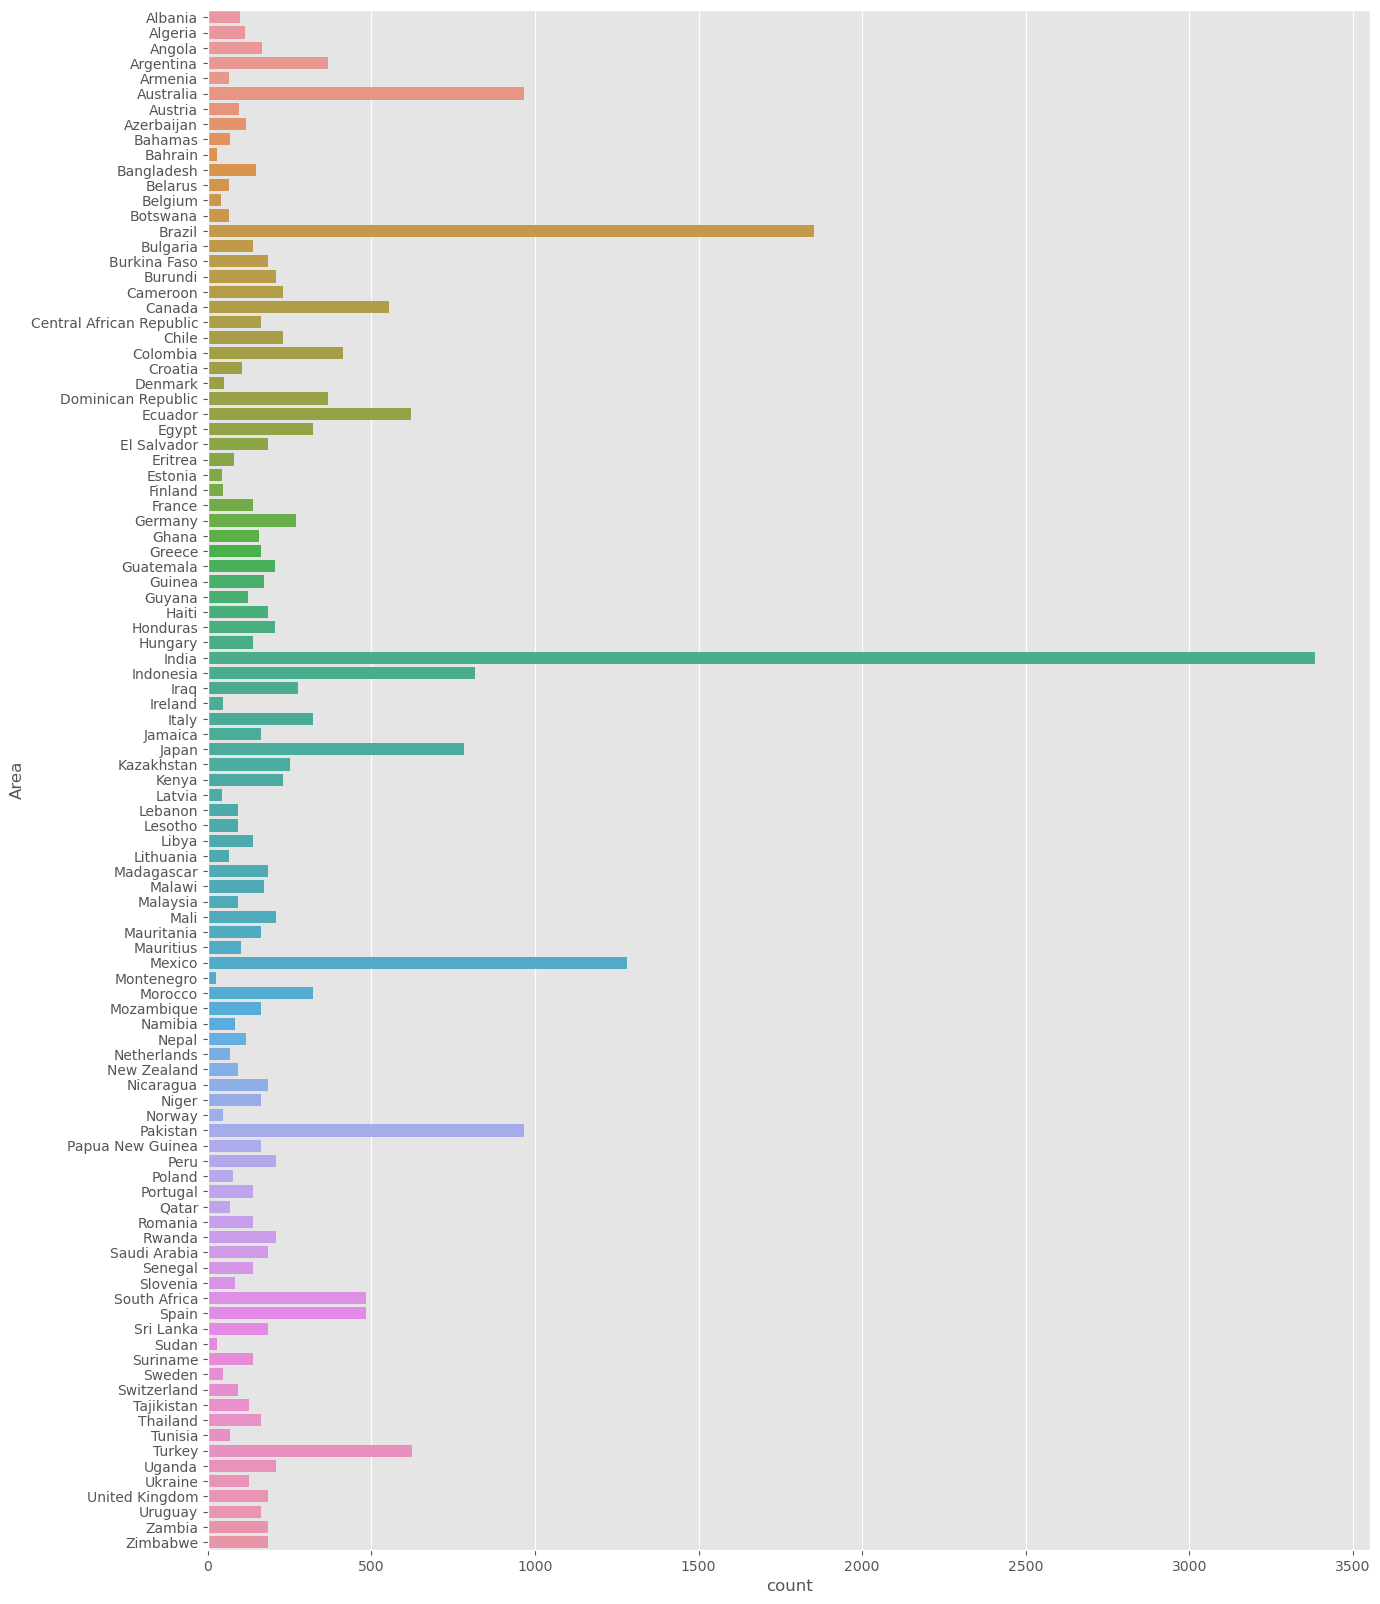

In [20]:
plt.figure(figsize=(15,20))
sns.countplot(y = df['Area'])
plt.show()

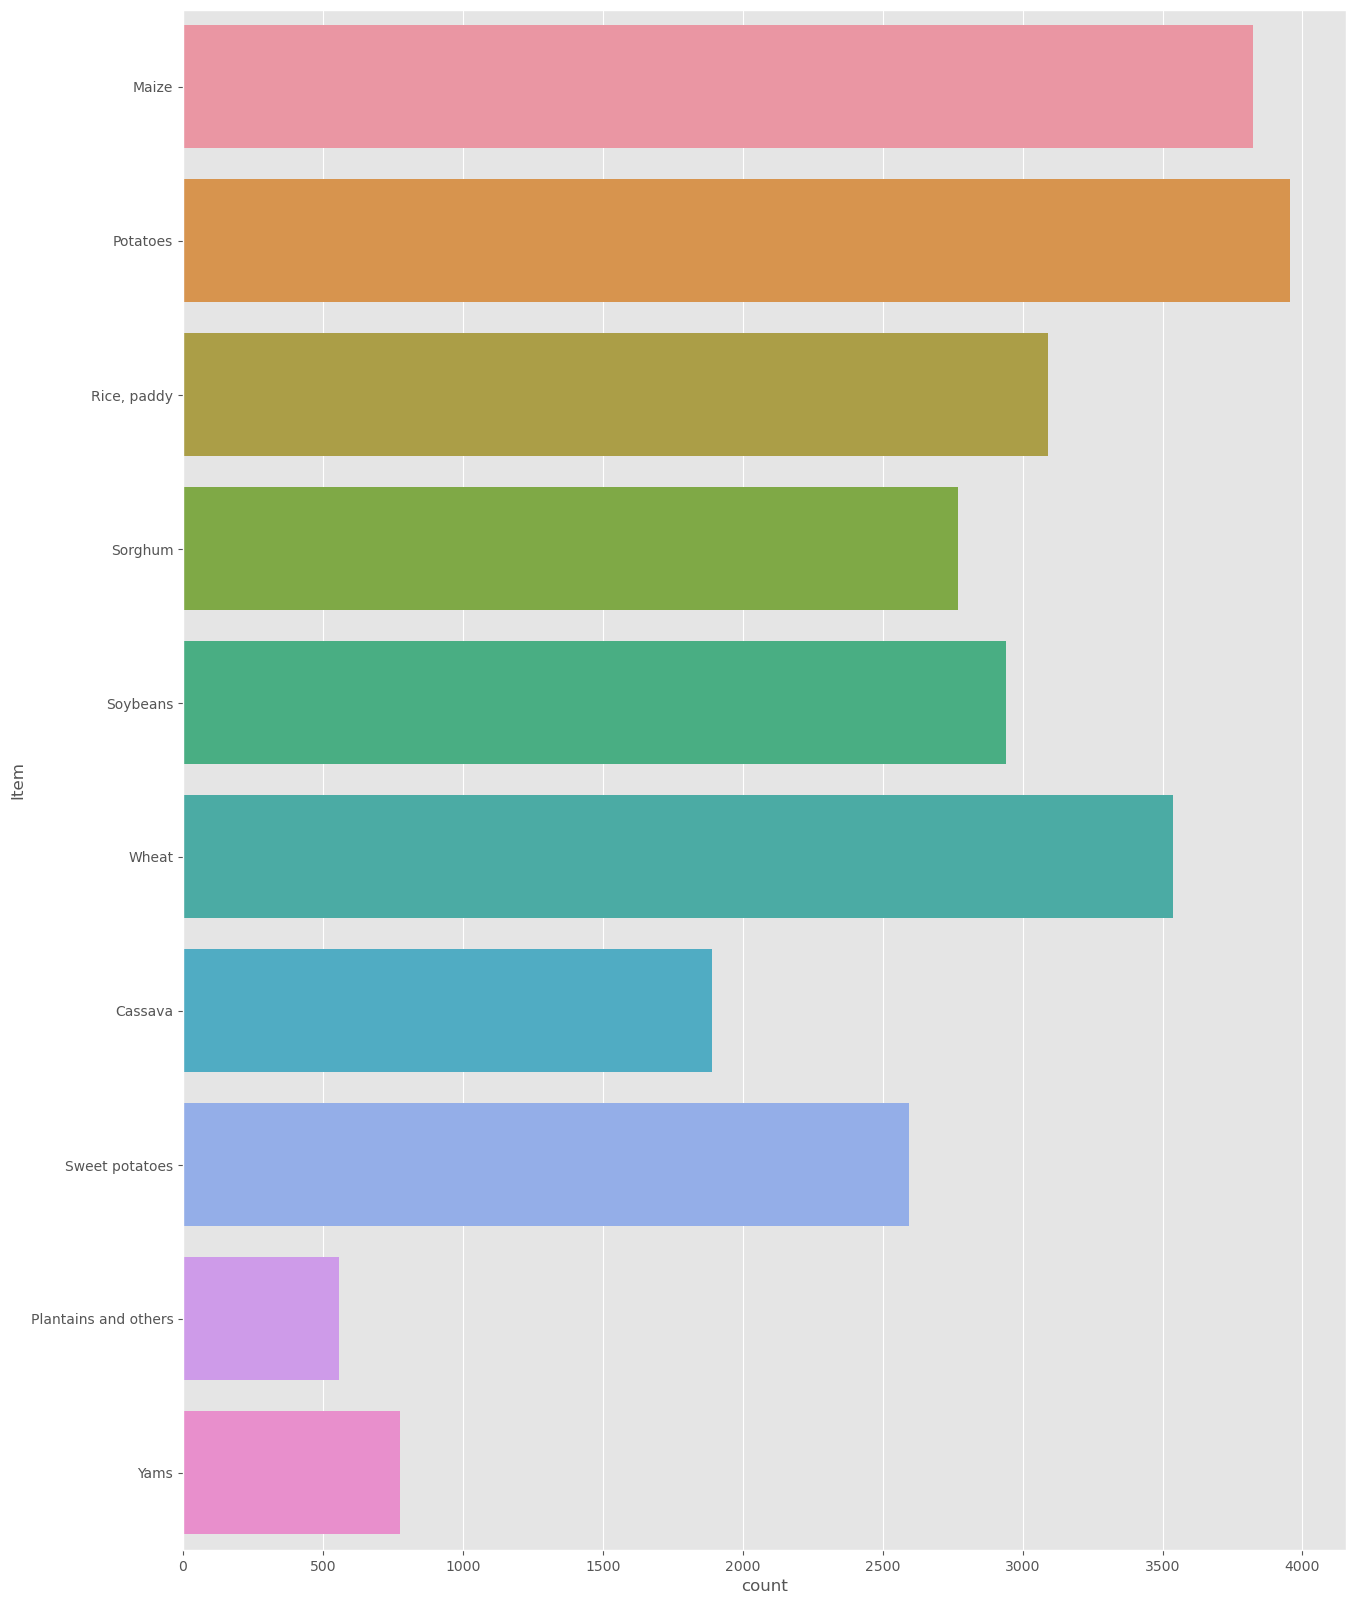

In [21]:
plt.figure(figsize=(15,20))
sns.countplot(y = df['Item'])
plt.show()

In [22]:
(df['Area'].value_counts() <400).sum()

88

In [23]:
country = df['Area'].unique()
yield_per_country = []
for state in country:
    yield_per_country.append(df[df['Area'] == state]['hg/ha_yield'].sum())

In [24]:
df['hg/ha_yield'].sum()

1996196943

In [25]:
yield_per_country

[5711536,
 6711464,
 5722563,
 32864032,
 4524100,
 109111062,
 10852258,
 4608380,
 4384717,
 4443889,
 7720159,
 4704812,
 8442270,
 470651,
 136340329,
 6263075,
 6083337,
 7031146,
 10717883,
 34706922,
 4255627,
 20561214,
 26927138,
 6083167,
 10701651,
 25312166,
 21315591,
 36828848,
 16855944,
 1452416,
 3595638,
 6210668,
 15790618,
 38780463,
 9260371,
 14571925,
 16508723,
 7975743,
 8361103,
 8619194,
 10920131,
 8824110,
 274219558,
 68067328,
 10984722,
 9104030,
 32280700,
 19698007,
 100924145,
 9965212,
 14391737,
 3698588,
 6956804,
 4258932,
 9016288,
 4174348,
 6103523,
 8346715,
 7934982,
 15106720,
 4465841,
 12684212,
 113698872,
 1645100,
 22173010,
 6964027,
 3165475,
 4113713,
 14086433,
 17657728,
 12819227,
 12316327,
 6721305,
 49264956,
 10729929,
 15201910,
 6564711,
 12154347,
 5995626,
 6006156,
 7741053,
 15171886,
 10342677,
 7197013,
 30999849,
 46773540,
 11217741,
 1896346,
 14786468,
 8620653,
 13336346,
 6295210,
 9511720,
 3724246,
 52263950,
 

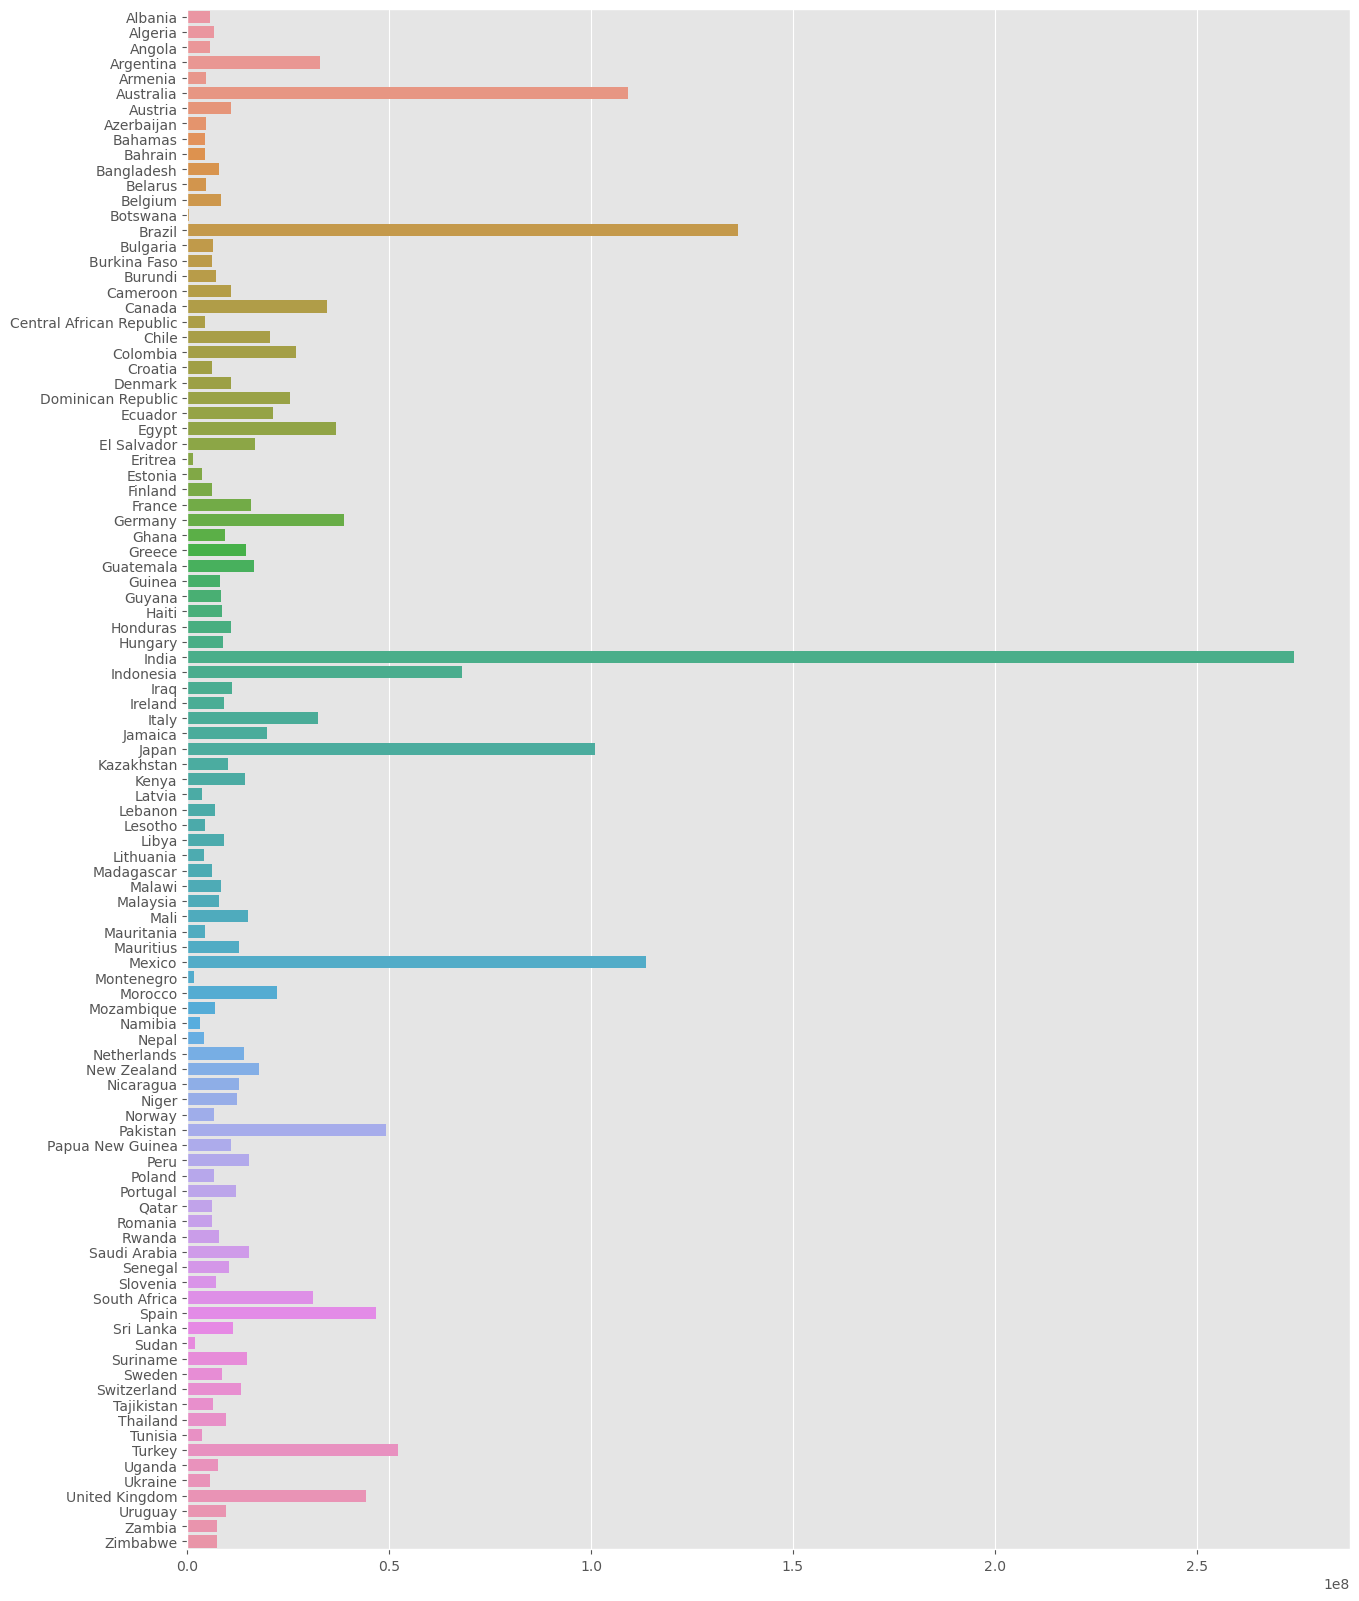

In [26]:
plt.figure(figsize=(15,20))
sns.barplot(y = country, x = yield_per_country)
plt.show()

In [27]:
crops = df['Item'].unique()
yield_per_crop = []
for crop in crops:
    yield_per_crop.append(df[df['Item'] == crop]['hg/ha_yield'].sum())

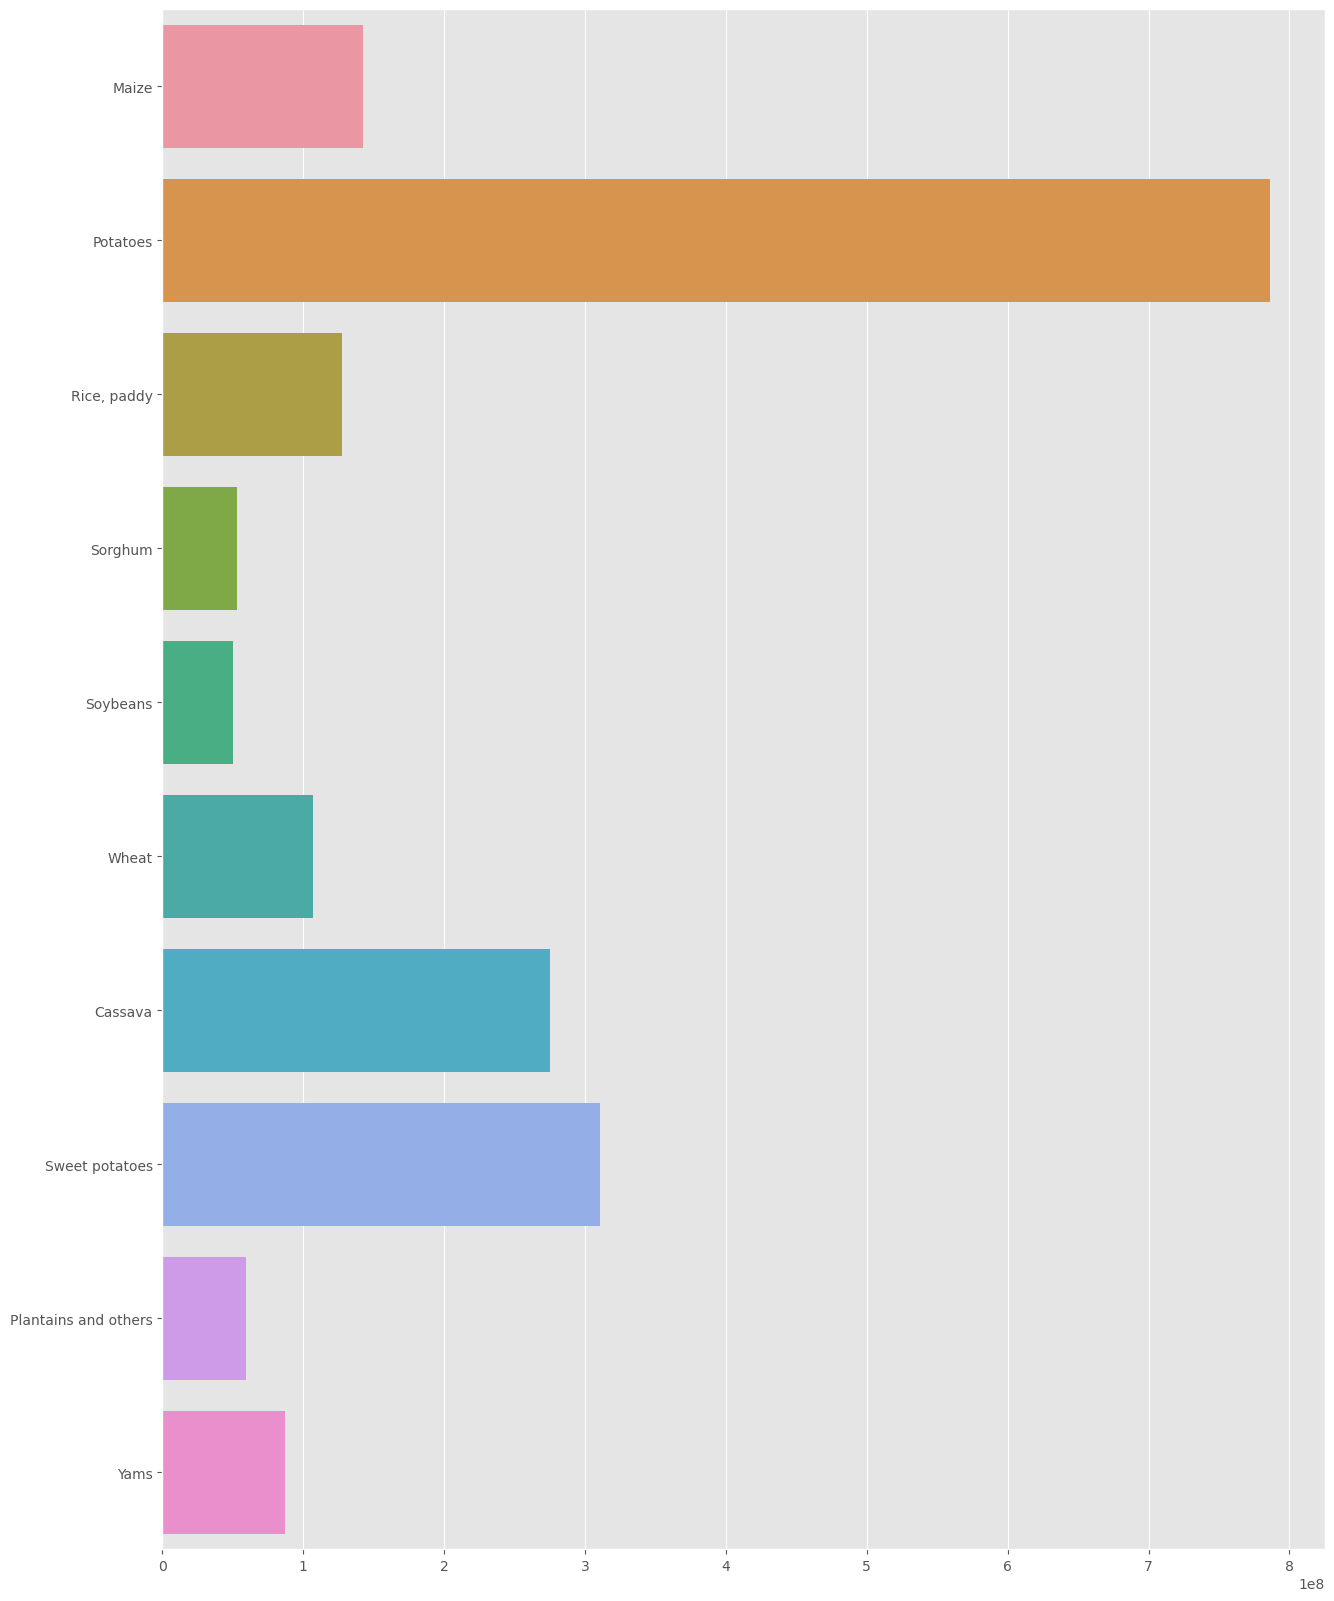

In [28]:
plt.figure(figsize=(15,20))
sns.barplot(y = crops, x = yield_per_crop)
plt.show()

In [29]:
df.head()

,Area,Item,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
0,Albania,Maize,1990,36613,1485.0,121.0,16.37
1,Albania,Potatoes,1990,66667,1485.0,121.0,16.37
2,Albania,"Rice, paddy",1990,23333,1485.0,121.0,16.37
3,Albania,Sorghum,1990,12500,1485.0,121.0,16.37
4,Albania,Soybeans,1990,7000,1485.0,121.0,16.37


In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, r2_score

# Defining the columns
col = ['Year', 'average_rain_fall_mm_per_year', 'pesticides_tonnes', 'avg_temp', 'Area', 'Item', 'hg/ha_yield']

# Creating the DataFrame (assuming 'df' is already your DataFrame)
df = df[col]

# Separating features and target variable
X = df.drop('hg/ha_yield', axis=1)
y = df['hg/ha_yield']

# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, shuffle=True)

# Defining the preprocessors
ohe = OneHotEncoder(drop='first')
scale = StandardScaler()

preprocesser = ColumnTransformer(
    transformers=[
        ('StandardScale', scale, [0, 1, 2, 3]),  # Assuming these are numeric columns
        ('OneHotEncode', ohe, [4, 5])            # Assuming these are categorical columns
    ], 
    remainder='passthrough'
) 

# Fit the preprocesser on the training data and transform both train and test data
X_train_dummy = preprocesser.fit_transform(X_train)
X_test_dummy = preprocesser.transform(X_test)

# Retrieving feature names after transformation
feature_names = preprocesser.get_feature_names_out()

# Displaying the feature names
print(feature_names)

# Defining the models
models = {
    'Linear Regression': LinearRegression(),
    'Lasso' : Lasso(),
    'Ridge' : Ridge(),
    'Decision Tree': DecisionTreeRegressor(),
    'KNN': KNeighborsRegressor(),
}

# Training and evaluating the models
for name, md in models.items():
    md.fit(X_train_dummy, y_train)
    y_pred = md.predict(X_test_dummy)
    print(f"{name}: MAE: {mean_absolute_error(y_test, y_pred):.4f}, R2 Score: {r2_score(y_test, y_pred):.4f}")


['StandardScale__Year' 'StandardScale__average_rain_fall_mm_per_year'
 'StandardScale__pesticides_tonnes' 'StandardScale__avg_temp'
 'OneHotEncode__Area_Algeria' 'OneHotEncode__Area_Angola'
 'OneHotEncode__Area_Argentina' 'OneHotEncode__Area_Armenia'
 'OneHotEncode__Area_Australia' 'OneHotEncode__Area_Austria'
 'OneHotEncode__Area_Azerbaijan' 'OneHotEncode__Area_Bahamas'
 'OneHotEncode__Area_Bahrain' 'OneHotEncode__Area_Bangladesh'
 'OneHotEncode__Area_Belarus' 'OneHotEncode__Area_Belgium'
 'OneHotEncode__Area_Botswana' 'OneHotEncode__Area_Brazil'
 'OneHotEncode__Area_Bulgaria' 'OneHotEncode__Area_Burkina Faso'
 'OneHotEncode__Area_Burundi' 'OneHotEncode__Area_Cameroon'
 'OneHotEncode__Area_Canada' 'OneHotEncode__Area_Central African Republic'
 'OneHotEncode__Area_Chile' 'OneHotEncode__Area_Colombia'
 'OneHotEncode__Area_Croatia' 'OneHotEncode__Area_Denmark'
 'OneHotEncode__Area_Dominican Republic' 'OneHotEncode__Area_Ecuador'
 'OneHotEncode__Area_Egypt' 'OneHotEncode__Area_El Salvador

C:\Users\harik\ANACONDA\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:658: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 265453683310.69922, tolerance: 16161857296.835388
  model = cd_fast.sparse_enet_coordinate_descent(


Lasso: MAE: 29237.9258, R2 Score: 0.7597
Ridge: MAE: 29208.3137, R2 Score: 0.7596
Decision Tree: MAE: 3647.2084, R2 Score: 0.9815
KNN: MAE: 4471.5398, R2 Score: 0.9861


In [4]:
dtr = DecisionTreeRegressor()
dtr.fit(X_train_dummy,y_train)
dtr.predict(X_test_dummy)

array([ 33157.,  87717.,  43022., ..., 165000.,  94475.,  72700.])

In [47]:
df.columns

Index(['Year', 'average_rain_fall_mm_per_year', 'pesticides_tonnes',
       'avg_temp', 'Area', 'Item', 'hg/ha_yield'],
      dtype='object')

In [48]:
df.head()

,Year,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp,Area,Item,hg/ha_yield
0,1990,1485.0,121.0,16.37,Albania,Maize,36613
1,1990,1485.0,121.0,16.37,Albania,Potatoes,66667
2,1990,1485.0,121.0,16.37,Albania,"Rice, paddy",23333
3,1990,1485.0,121.0,16.37,Albania,Sorghum,12500
4,1990,1485.0,121.0,16.37,Albania,Soybeans,7000


In [ ]:
def prediction(Year, average_rain_fall_mm_per_year,pesticides_tonnes, avg_temp, Area, Item):
    features = np.array([[Year, average_rain_fall_mm_per_year,pesticides_tonnes, avg_temp, Area, Item]], dtype = object)
    transform_features = preprocesser.transform(features)
    predicted_yeild = dtr.predict(transform_features).reshape(-1,1)
    return predicted_yeild[0][0]

In [49]:
result = prediction(1990,1485.0,121.0,16.37,'Albania','Maize')

NameError: name 'prediction' is not defined

In [50]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, r2_score

# Defining the columns
col = ['Year', 'average_rain_fall_mm_per_year', 'pesticides_tonnes', 'avg_temp', 'Area', 'Item', 'hg/ha_yield']

# Creating the DataFrame (assuming 'df' is already your DataFrame)
# For this example, you need to have the DataFrame `df` already defined

# Separating features and target variable
X = df.drop('hg/ha_yield', axis=1)
y = df['hg/ha_yield']

# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, shuffle=True)

# Defining the preprocessors
ohe = OneHotEncoder(drop='first')
scale = StandardScaler()

preprocesser = ColumnTransformer(
    transformers=[
        ('StandardScale', scale, [0, 1, 2, 3]),  # Assuming these are numeric columns
        ('OneHotEncode', ohe, [4, 5])            # Assuming these are categorical columns
    ], 
    remainder='passthrough'
) 

# Fit the preprocesser on the training data and transform both train and test data
X_train_dummy = preprocesser.fit_transform(X_train)
X_test_dummy = preprocesser.transform(X_test)

# Retrieving feature names after transformation
feature_names = preprocesser.get_feature_names_out()

# Displaying the feature names
print(feature_names)

# Defining the models
models = {
    'Linear Regression': LinearRegression(),
    'Lasso' : Lasso(),
    'Ridge' : Ridge(),
    'Decision Tree': DecisionTreeRegressor(),
    'KNN': KNeighborsRegressor(),
}

# Training and evaluating the models
for name, md in models.items():
    md.fit(X_train_dummy, y_train)
    y_pred = md.predict(X_test_dummy)
    print(f"{name}: MAE: {mean_absolute_error(y_test, y_pred):.4f}, R2 Score: {r2_score(y_test, y_pred):.4f}")

# Selecting the Decision Tree Regressor model
dtr = models['Decision Tree']

# Prediction function
def prediction(Year, average_rain_fall_mm_per_year, pesticides_tonnes, avg_temp, Area, Item):
    features = np.array([[Year, average_rain_fall_mm_per_year, pesticides_tonnes, avg_temp, Area, Item]], dtype=object)
    transform_features = preprocesser.transform(features)
    predicted_yield = dtr.predict(transform_features).reshape(-1, 1)
    return predicted_yield[0][0]

# Example usage of the prediction function
result = prediction(1990, 1485.0, 121.0, 16.37, 'Albania', 'Maize')
print(result)


['StandardScale__Year' 'StandardScale__average_rain_fall_mm_per_year'
 'StandardScale__pesticides_tonnes' 'StandardScale__avg_temp'
 'OneHotEncode__Area_Algeria' 'OneHotEncode__Area_Angola'
 'OneHotEncode__Area_Argentina' 'OneHotEncode__Area_Armenia'
 'OneHotEncode__Area_Australia' 'OneHotEncode__Area_Austria'
 'OneHotEncode__Area_Azerbaijan' 'OneHotEncode__Area_Bahamas'
 'OneHotEncode__Area_Bahrain' 'OneHotEncode__Area_Bangladesh'
 'OneHotEncode__Area_Belarus' 'OneHotEncode__Area_Belgium'
 'OneHotEncode__Area_Botswana' 'OneHotEncode__Area_Brazil'
 'OneHotEncode__Area_Bulgaria' 'OneHotEncode__Area_Burkina Faso'
 'OneHotEncode__Area_Burundi' 'OneHotEncode__Area_Cameroon'
 'OneHotEncode__Area_Canada' 'OneHotEncode__Area_Central African Republic'
 'OneHotEncode__Area_Chile' 'OneHotEncode__Area_Colombia'
 'OneHotEncode__Area_Croatia' 'OneHotEncode__Area_Denmark'
 'OneHotEncode__Area_Dominican Republic' 'OneHotEncode__Area_Ecuador'
 'OneHotEncode__Area_Egypt' 'OneHotEncode__Area_El Salvador

C:\Users\harik\ANACONDA\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:592: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 67280771830.03516, tolerance: 14848622817.505228
  model = cd_fast.sparse_enet_coordinate_descent(


Lasso: MAE: 29893.9976, R2 Score: 0.7473
Ridge: MAE: 29864.8607, R2 Score: 0.7473
Decision Tree: MAE: 3971.5431, R2 Score: 0.9793
KNN: MAE: 4620.0373, R2 Score: 0.9849
36613.0


C:\Users\harik\ANACONDA\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\harik\ANACONDA\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but OneHotEncoder was fitted with feature names
  warnings.warn(


In [51]:
result

36613.0

In [53]:
import pickle
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import StandardScaler

# Example model and preprocessor
dtr = DecisionTreeRegressor()
preprocessor = StandardScaler()

# Fit the preprocessor and the model with example data (if not already done)
# preprocessor.fit(X_train)
# dtr.fit(X_train_transformed, y_train)

# Check the current working directory
import os
print("Current working directory:", os.getcwd())

# Save the model and the preprocessor
with open("dtr.pkl", "wb") as model_file:
    pickle.dump(dtr, model_file)

with open("preprocessor.pkl", "wb") as preprocessor_file:
    pickle.dump(preprocessor, preprocessor_file)

# List files in the current directory to confirm saving
print("Files in directory after saving:")
print(os.listdir(os.getcwd()))


Current working directory: C:\Users\harik
Files in directory after saving:
['.anaconda', '.conda', '.condarc', '.continuum', '.idlerc', '.ipynb_checkpoints', '.ipython', '.jupyter', '.matplotlib', '.virtual_documents', '.vscode', '3D Objects', 'ANACONDA', 'anaconda3', 'AppData', 'Application Data', 'Contacts', 'Cookies', 'Documents', 'Downloads', 'dtr.pkl', 'Favorites', 'HARIPROJECT2.ipynb', 'IntelGraphicsProfiles', 'javac', 'Links', 'Local Settings', 'My Documents', 'NetHood', 'NTUSER.DAT', 'ntuser.dat.LOG1', 'ntuser.dat.LOG2', 'NTUSER.DAT{cffde5f9-cd2f-11ed-8789-a3c793ad6ff9}.TM.blf', 'NTUSER.DAT{cffde5f9-cd2f-11ed-8789-a3c793ad6ff9}.TMContainer00000000000000000001.regtrans-ms', 'NTUSER.DAT{cffde5f9-cd2f-11ed-8789-a3c793ad6ff9}.TMContainer00000000000000000002.regtrans-ms', 'ntuser.ini', 'OneDrive', 'preprocesser.pkl', 'preprocessor.pkl', 'PrintHood', 'project.ipynb', 'Recent', 'Saved Games', 'Searches', 'SendTo', 'Start Menu', 'Templates', 'Untitled Folder', 'Videos', 'yield_df.csv',

In [6]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, r2_score
import pickle

# Defining the columns
col = ['Year', 'average_rain_fall_mm_per_year', 'pesticides_tonnes', 'avg_temp', 'Area', 'Item', 'hg/ha_yield']

# Creating the DataFrame (assuming 'df' is already your DataFrame)
df = df[col]

# Separating features and target variable
X = df.drop('hg/ha_yield', axis=1)
y = df['hg/ha_yield']

# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, shuffle=True)

# Defining the preprocessors
ohe = OneHotEncoder(drop='first')
scale = StandardScaler()

preprocessor = ColumnTransformer(
    transformers=[
        ('StandardScale', scale, [0, 1, 2, 3]),  # Assuming these are numeric columns
        ('OneHotEncode', ohe, [4, 5])            # Assuming these are categorical columns
    ], 
    remainder='passthrough'
)

# Fit the preprocessor on the training data and transform both train and test data
X_train_transformed = preprocessor.fit_transform(X_train)
X_test_transformed = preprocessor.transform(X_test)

# Defining the model
dtr = DecisionTreeRegressor()

# Train the model
dtr.fit(X_train_transformed, y_train)

# Evaluate the model
y_pred = dtr.predict(X_test_transformed)
print(f"Decision Tree: MAE: {mean_absolute_error(y_test, y_pred):.4f}, R2 Score: {r2_score(y_test, y_pred):.4f}")

# Save the model and the preprocessor
with open("dtr.pkl", "wb") as model_file:
    pickle.dump(dtr, model_file)

with open("preprocessor.pkl", "wb") as preprocessor_file:
    pickle.dump(preprocessor, preprocessor_file)


Decision Tree: MAE: 3723.2071, R2 Score: 0.9807


In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, r2_score
import pickle

# Load the dataset
df = pd.read_csv('yield_df.csv')
df.drop('Unnamed: 0', axis=1, inplace=True)

# Defining the columns
col = ['Year', 'average_rain_fall_mm_per_year', 'pesticides_tonnes', 'avg_temp', 'Area', 'Item', 'hg/ha_yield']

# Ensuring the DataFrame has the required columns
df = df[col]

# Separating features and target variable
X = df.drop('hg/ha_yield', axis=1)
y = df['hg/ha_yield']

# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, shuffle=True)

# Defining the preprocessors
ohe = OneHotEncoder(drop='first',handle_unknown='ignore')
scale = StandardScaler()

preprocessor = ColumnTransformer(
    transformers=[
        ('StandardScale', scale, [0, 1, 2, 3]),  # Assuming these are numeric columns
        ('OneHotEncode', ohe, [4, 5])            # Assuming these are categorical columns
    ], 
    remainder='passthrough'
) 

# Fit the preprocessor on the training data and transform both train and test data
X_train_transformed = preprocessor.fit_transform(X_train)
X_test_transformed = preprocessor.transform(X_test)

# Retrieving feature names after transformation
feature_names = preprocessor.get_feature_names_out()

# Displaying the feature names
print(feature_names)

# Defining the models
models = {
    'Linear Regression': LinearRegression(),
    'Lasso' : Lasso(),
    'Ridge' : Ridge(),
    'Decision Tree': DecisionTreeRegressor(),
    'KNN': KNeighborsRegressor(),
}

# Training and evaluating the models
for name, model in models.items():
    model.fit(X_train_transformed, y_train)
    y_pred = model.predict(X_test_transformed)
    print(f"{name}: MAE: {mean_absolute_error(y_test, y_pred):.4f}, R2 Score: {r2_score(y_test, y_pred):.4f}")

# Selecting the Decision Tree Regressor model
dtr = models['Decision Tree']

# Save the model and the preprocessor
with open("dtr.pkl", "wb") as model_file:
    pickle.dump(dtr, model_file)

with open("preprocessor.pkl", "wb") as preprocessor_file:
    pickle.dump(preprocessor, preprocessor_file)


['StandardScale__Year' 'StandardScale__average_rain_fall_mm_per_year'
 'StandardScale__pesticides_tonnes' 'StandardScale__avg_temp'
 'OneHotEncode__Area_Algeria' 'OneHotEncode__Area_Angola'
 'OneHotEncode__Area_Argentina' 'OneHotEncode__Area_Armenia'
 'OneHotEncode__Area_Australia' 'OneHotEncode__Area_Austria'
 'OneHotEncode__Area_Azerbaijan' 'OneHotEncode__Area_Bahamas'
 'OneHotEncode__Area_Bahrain' 'OneHotEncode__Area_Bangladesh'
 'OneHotEncode__Area_Belarus' 'OneHotEncode__Area_Belgium'
 'OneHotEncode__Area_Botswana' 'OneHotEncode__Area_Brazil'
 'OneHotEncode__Area_Bulgaria' 'OneHotEncode__Area_Burkina Faso'
 'OneHotEncode__Area_Burundi' 'OneHotEncode__Area_Cameroon'
 'OneHotEncode__Area_Canada' 'OneHotEncode__Area_Central African Republic'
 'OneHotEncode__Area_Chile' 'OneHotEncode__Area_Colombia'
 'OneHotEncode__Area_Croatia' 'OneHotEncode__Area_Denmark'
 'OneHotEncode__Area_Dominican Republic' 'OneHotEncode__Area_Ecuador'
 'OneHotEncode__Area_Egypt' 'OneHotEncode__Area_El Salvador

C:\Users\harik\ANACONDA\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:658: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 265453683310.69922, tolerance: 16161857296.835388
  model = cd_fast.sparse_enet_coordinate_descent(


Lasso: MAE: 29237.9258, R2 Score: 0.7597
Ridge: MAE: 29208.3137, R2 Score: 0.7596
Decision Tree: MAE: 3707.0864, R2 Score: 0.9809
KNN: MAE: 4471.5398, R2 Score: 0.9861


In [3]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, r2_score
import pickle

# Load the dataset
df = pd.read_csv('yield_df.csv')
df.drop('Unnamed: 0', axis=1, inplace=True)

# Defining the columns
col = ['Year', 'average_rain_fall_mm_per_year', 'pesticides_tonnes', 'avg_temp', 'Area', 'Item', 'hg/ha_yield']

# Ensuring the DataFrame has the required columns
df = df[col]

# Separating features and target variable
X = df.drop('hg/ha_yield', axis=1)
y = df['hg/ha_yield']

# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, shuffle=True)

# Defining the preprocessors
ohe = OneHotEncoder(drop='first', handle_unknown='ignore')
scale = StandardScaler()

preprocessor = ColumnTransformer(
    transformers=[
        ('StandardScale', scale, ['Year', 'average_rain_fall_mm_per_year', 'pesticides_tonnes', 'avg_temp']),
        ('OneHotEncode', ohe, ['Area', 'Item'])
    ],
    remainder='passthrough'
)

# Fit the preprocessor on the training data and transform both train and test data
X_train_transformed = preprocessor.fit_transform(X_train)
X_test_transformed = preprocessor.transform(X_test)

# Retrieving feature names after transformation
feature_names = preprocessor.get_feature_names_out()

# Displaying the feature names
print(feature_names)

# Defining the models
models = {
    'Linear Regression': LinearRegression(),
    'Lasso': Lasso(),
    'Ridge': Ridge(),
    'Decision Tree': DecisionTreeRegressor(),
    'KNN': KNeighborsRegressor(),
}

# Training and evaluating the models
for name, model in models.items():
    model.fit(X_train_transformed, y_train)
    y_pred = model.predict(X_test_transformed)
    print(f"{name}: MAE: {mean_absolute_error(y_test, y_pred):.4f}, R2 Score: {r2_score(y_test, y_pred):.4f}")

# Selecting the Decision Tree Regressor model
dtr = models['Decision Tree']

# Save the model and the preprocessor
with open("dtr.pkl", "wb") as model_file:
    pickle.dump(dtr, model_file)

with open("preprocessor.pkl", "wb") as preprocessor_file:
    pickle.dump(preprocessor, preprocessor_file)


['StandardScale__Year' 'StandardScale__average_rain_fall_mm_per_year'
 'StandardScale__pesticides_tonnes' 'StandardScale__avg_temp'
 'OneHotEncode__Area_Algeria' 'OneHotEncode__Area_Angola'
 'OneHotEncode__Area_Argentina' 'OneHotEncode__Area_Armenia'
 'OneHotEncode__Area_Australia' 'OneHotEncode__Area_Austria'
 'OneHotEncode__Area_Azerbaijan' 'OneHotEncode__Area_Bahamas'
 'OneHotEncode__Area_Bahrain' 'OneHotEncode__Area_Bangladesh'
 'OneHotEncode__Area_Belarus' 'OneHotEncode__Area_Belgium'
 'OneHotEncode__Area_Botswana' 'OneHotEncode__Area_Brazil'
 'OneHotEncode__Area_Bulgaria' 'OneHotEncode__Area_Burkina Faso'
 'OneHotEncode__Area_Burundi' 'OneHotEncode__Area_Cameroon'
 'OneHotEncode__Area_Canada' 'OneHotEncode__Area_Central African Republic'
 'OneHotEncode__Area_Chile' 'OneHotEncode__Area_Colombia'
 'OneHotEncode__Area_Croatia' 'OneHotEncode__Area_Denmark'
 'OneHotEncode__Area_Dominican Republic' 'OneHotEncode__Area_Ecuador'
 'OneHotEncode__Area_Egypt' 'OneHotEncode__Area_El Salvador

C:\Users\harik\ANACONDA\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:658: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 265453683310.69922, tolerance: 16161857296.835388
  model = cd_fast.sparse_enet_coordinate_descent(


Lasso: MAE: 29237.9258, R2 Score: 0.7597
Ridge: MAE: 29208.3137, R2 Score: 0.7596
Decision Tree: MAE: 3723.3686, R2 Score: 0.9799
KNN: MAE: 4471.5398, R2 Score: 0.9861


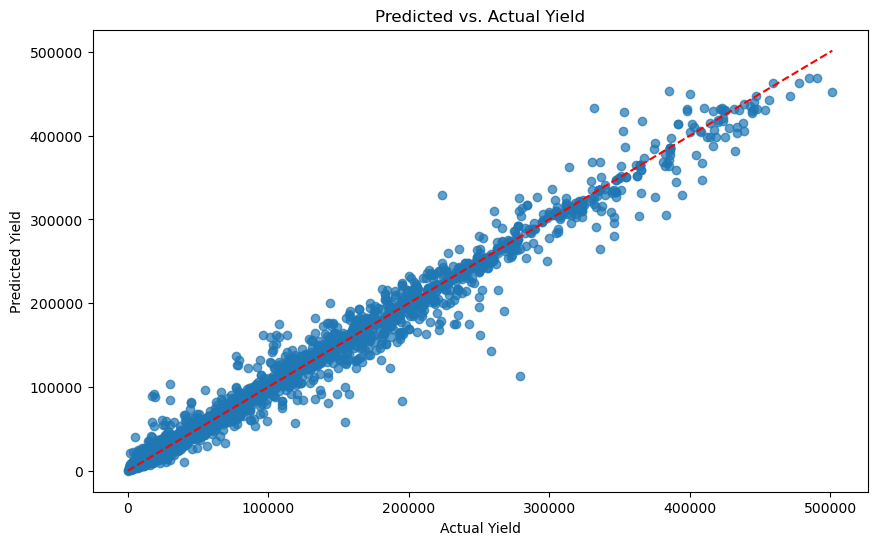

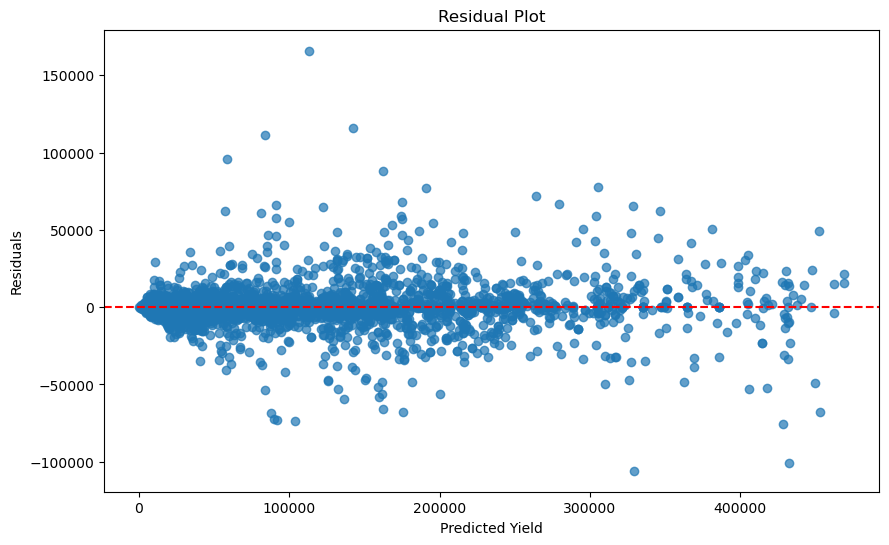

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# Predicted vs. Actual Plot
plt.figure(figsize=(10, 6))3
plt.scatter(y_test, y_pred, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Actual Yield')
plt.ylabel('Predicted Yield')
plt.title('Predicted vs. Actual Yield')
plt.show()

# Residual Plot
residuals = y_test - y_pred
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals, alpha=0.7)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Yield')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()


In [6]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, r2_score
import pickle

# Load the updated dataset
df = pd.read_csv('yield_df.csv')
df.drop('Unnamed: 0', axis=1, inplace=True)

# Defining the columns
col = ['Year', 'average_rain_fall_mm_per_year', 'pesticides_tonnes', 'avg_temp', 'Area', 'Item', 'hg/ha_yield']

# Ensuring the DataFrame has the required columns
df = df[col]

# Separating features and target variable
X = df.drop('hg/ha_yield', axis=1)
y = df['hg/ha_yield']

# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, shuffle=True)

# Defining the preprocessors
ohe = OneHotEncoder(drop='first', handle_unknown='ignore')
scale = StandardScaler()

preprocessor = ColumnTransformer(
    transformers=[
        ('StandardScale', scale, [0, 1, 2, 3]),  # Assuming these are numeric columns
        ('OneHotEncode', ohe, [4, 5])            # Assuming these are categorical columns
    ], 
    remainder='passthrough'
) 

# Fit the preprocessor on the training data and transform both train and test data
X_train_transformed = preprocessor.fit_transform(X_train)
X_test_transformed = preprocessor.transform(X_test)

# Defining the models
models = {
    'Linear Regression': LinearRegression(),
    'Lasso': Lasso(),
    'Ridge': Ridge(),
    'Decision Tree': DecisionTreeRegressor(),
}

# Training and evaluating the models
for name, model in models.items():
    model.fit(X_train_transformed, y_train)
    y_pred = model.predict(X_test_transformed)
    print(f"{name}: MAE: {mean_absolute_error(y_test, y_pred):.4f}, R2 Score: {r2_score(y_test, y_pred):.4f}")

# Selecting the Decision Tree Regressor model
dtr = models['Decision Tree']

# Save the model and the preprocessor.  
with open("dtr.pkl", "wb") as model_file:
    pickle.dump(dtr, model_file)

with open("preprocessor.pkl", "wb") as preprocessor_file:
    pickle.dump(preprocessor, preprocessor_file)


Linear Regression: MAE: 29261.0133, R2 Score: 0.7597


C:\Users\harik\ANACONDA\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:658: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 265453683310.69922, tolerance: 16161857296.835388
  model = cd_fast.sparse_enet_coordinate_descent(


Lasso: MAE: 29237.9258, R2 Score: 0.7597
Ridge: MAE: 29208.3137, R2 Score: 0.7596
Decision Tree: MAE: 3695.2300, R2 Score: 0.9799


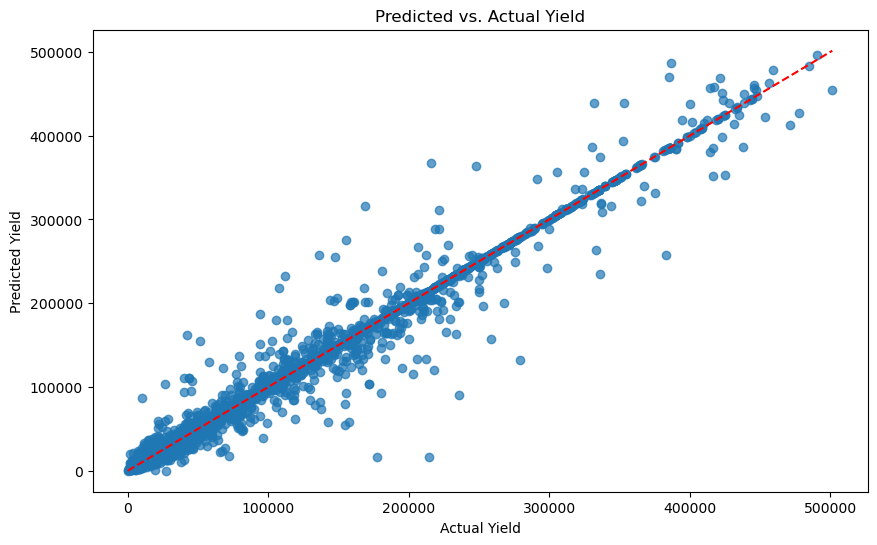

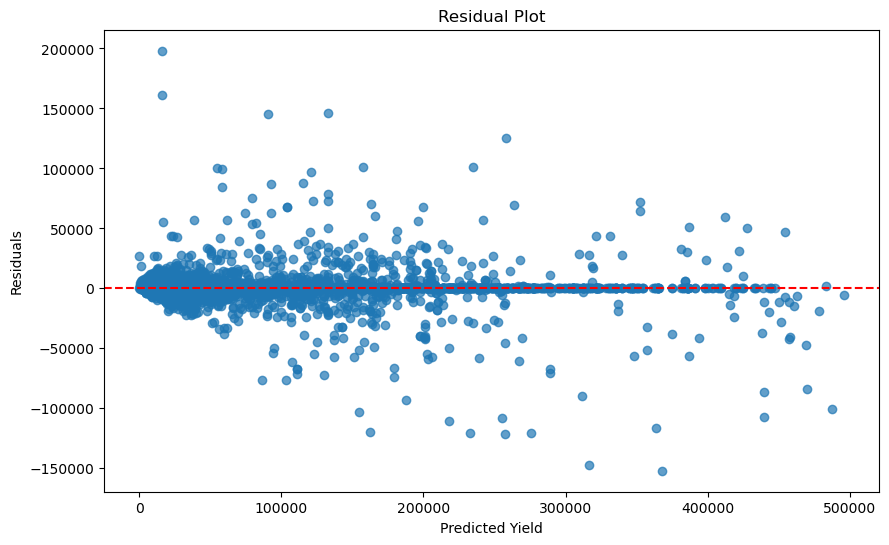

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Predicted vs. Actual Plot
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Actual Yield')
plt.ylabel('Predicted Yield')
plt.title('Predicted vs. Actual Yield')
plt.show()

# Residual Plot
residuals = y_test - y_pred
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals, alpha=0.7)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Yield')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()
